## Plotting figures for IBB task 3

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Base model comparison

In [116]:
data = pd.read_csv("data/multiple_model_comparison.tsv", sep="\t", index_col=["model"]).T
data[["preprocessing", "base_model", "final_layers"]] = data.apply(lambda row: row.name.split("-"), axis=1, result_type="expand")
data.head()

model                                    rank1  rank5  rank10  \
no_preprocessing-ResNet50-small          0.008  0.048   0.088   
no_preprocessing-ResNet50-wide_and_deep  0.004  0.036   0.088   
no_preprocessing-ResNet50-direct         0.028  0.092   0.156   
no_preprocessing-Xception-small          0.012  0.100   0.188   
no_preprocessing-Xception-wide_and_deep  0.100  0.252   0.380   

model                                       preprocessing base_model  \
no_preprocessing-ResNet50-small          no_preprocessing   ResNet50   
no_preprocessing-ResNet50-wide_and_deep  no_preprocessing   ResNet50   
no_preprocessing-ResNet50-direct         no_preprocessing   ResNet50   
no_preprocessing-Xception-small          no_preprocessing   Xception   
no_preprocessing-Xception-wide_and_deep  no_preprocessing   Xception   

model                                     final_layers  
no_preprocessing-ResNet50-small                  small  
no_preprocessing-ResNet50-wide_and_deep  wide_and_deep  
no_preprocessing-ResNet50-direct                direct  
no_preprocessing-Xception-small                  small  
no_preprocessing-Xception-wide_and_deep  wide_and_deep

In [117]:
cmc_data = pd.read_csv("data/cmc_curves_comparison.tsv", sep="\t", index_col=["model"])
cmc_data[["preprocessing", "base_model", "final_layers"]] = cmc_data.apply(lambda row: row.name.split("-"), axis=1, result_type="expand")
cmc_data.head()

rank1  rank2  rank3  rank4  rank5  \
model                                                                        
no_preprocessing-ResNet50-small          0.008  0.032  0.036  0.044  0.048   
no_preprocessing-ResNet50-wide_and_deep  0.004  0.016  0.028  0.032  0.036   
no_preprocessing-ResNet50-direct         0.028  0.052  0.068  0.084  0.092   
no_preprocessing-Xception-small          0.012  0.052  0.072  0.092  0.100   
no_preprocessing-Xception-wide_and_deep  0.100  0.136  0.172  0.224  0.252   

                                         rank6  rank7  rank8  rank9  rank10  \
model                                                                         
no_preprocessing-ResNet50-small          0.060  0.064  0.072  0.080   0.088   
no_preprocessing-ResNet50-wide_and_deep  0.048  0.056  0.056  0.076   0.088   
no_preprocessing-ResNet50-direct         0.108  0.120  0.144  0.148   0.156   
no_preprocessing-Xception-small          0.124  0.132  0.144  0.144   0.188   
no_preprocessing-Xception-wide_and_deep  0.276  0.308  0.348  0.368   0.380   

                                            preprocessing base_model  \
model                                                                  
no_preprocessing-ResNet50-small          no_preprocessing   ResNet50   
no_preprocessing-ResNet50-wide_and_deep  no_preprocessing   ResNet50   
no_preprocessing-ResNet50-direct         no_preprocessing   ResNet50   
no_preprocessing-Xception-small          no_preprocessing   Xception   
no_preprocessing-Xception-wide_and_deep  no_preprocessing   Xception   

                                          final_layers  
model                                                   
no_preprocessing-ResNet50-small                  small  
no_preprocessing-ResNet50-wide_and_deep  wide_and_deep  
no_preprocessing-ResNet50-direct                direct  
no_preprocessing-Xception-small                  small  
no_preprocessing-Xception-wide_and_deep  wide_and_deep

In [118]:
color_dict = {
    "ResNet50": "royalblue",
    "Xception": "red",
    "efficient_net_B0": "limegreen",
}
marker_dict = {
    "small": "--",
    "wide_and_deep": "-",
    "direct": ":"
}
label_dict = {
    "ResNet50": "ResNet50",
    "Xception": "Xception",
    "efficient_net_B0": "EfficientNetB0",
}
layer_dict = {
    "small": "S",
    "wide_and_deep": "W&D",
    "direct": "direct",
}

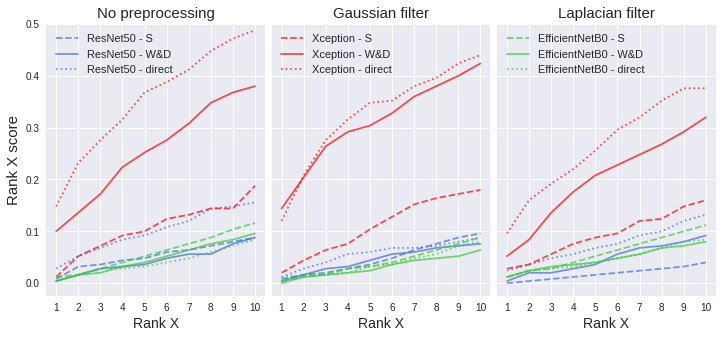

In [125]:
plt.style.use("seaborn")
f, ax = plt.subplots(1, 3, figsize=(12,5), sharey=True, gridspec_kw={"wspace":0.03})

for i, name in enumerate(["No preprocessing", "Gaussian filter", "Laplacian filter"]):
    ax[i].set_title(name, fontsize=15)

for i, preproc in enumerate(["no_preprocessing", "gaussian", "laplacian"]):

    temp = cmc_data[cmc_data["preprocessing"] == preproc]

    for name, row in temp.iterrows():

        ax[i].plot(
            list(range(1,11)),
            row[[f"rank{k}" for k in range(1,11)]].values,
            linestyle=marker_dict[row["final_layers"]],
            color=color_dict[row["base_model"]],
            label=None if list(label_dict.keys()).index(row["base_model"]) != i else label_dict[row["base_model"]]+f" - {layer_dict[row['final_layers']]}",
            alpha=0.7
        )

for i in range(3):
    ax[i].legend(fontsize=11, loc=2)
ax[0].set_ylabel("Rank X score", fontsize=15)
ax[0].set_ylim(top=0.5)

for i in range(3):
    ax[i].set_xlabel("Rank X", fontsize=14)
    ax[i].set_xticks(range(1,11))

f.savefig("figures/cmc_model_comparison.png", dpi=600, bbox_inches="tight")

### Plotting Xception improvements

In [126]:
xception_data = pd.read_csv("data/cmc_curves_Xception_comparison.tsv", sep="\t", index_col=["model"])
xception_data[["preprocessing", "base_model", "final_layers"]] = xception_data.apply(lambda row: row.name.split("-"), axis=1, result_type="expand")
xception_data.head()

rank1  rank2  rank3  rank4  rank5  \
model                                                                        
no_preprocessing-Xception-wider          0.164  0.232  0.284  0.332  0.352   
no_preprocessing-Xception-small          0.040  0.060  0.076  0.104  0.140   
no_preprocessing-Xception-wide_and_deep  0.108  0.164  0.228  0.272  0.296   
no_preprocessing-Xception-direct         0.188  0.280  0.324  0.376  0.404   
gaussian-Xception-wider                  0.176  0.288  0.344  0.380  0.416   

                                         rank6  rank7  rank8  rank9  rank10  \
model                                                                         
no_preprocessing-Xception-wider          0.388  0.424  0.444  0.468   0.484   
no_preprocessing-Xception-small          0.152  0.188  0.208  0.232   0.260   
no_preprocessing-Xception-wide_and_deep  0.316  0.348  0.372  0.392   0.412   
no_preprocessing-Xception-direct         0.412  0.440  0.468  0.476   0.496   
gaussian-Xception-wider                  0.448  0.472  0.492  0.496   0.516   

                                            preprocessing base_model  \
model                                                                  
no_preprocessing-Xception-wider          no_preprocessing   Xception   
no_preprocessing-Xception-small          no_preprocessing   Xception   
no_preprocessing-Xception-wide_and_deep  no_preprocessing   Xception   
no_preprocessing-Xception-direct         no_preprocessing   Xception   
gaussian-Xception-wider                          gaussian   Xception   

                                          final_layers  
model                                                   
no_preprocessing-Xception-wider                  wider  
no_preprocessing-Xception-small                  small  
no_preprocessing-Xception-wide_and_deep  wide_and_deep  
no_preprocessing-Xception-direct                direct  
gaussian-Xception-wider                          wider

In [127]:
color_dict = {
    "small": "red",
    "wide_and_deep": "limegreen",
    "direct": "gray",
    "wider": "royalblue",
}
marker_dict = {
    "small": "--",
    "wide_and_deep": "-",
    "direct": ":",
}
label_dict = {
    "ResNet50": "ResNet50",
    "Xception": "Xception",
    "efficient_net_B0": "EfficientNetB0",
}
layer_dict = {
    "small": "S",
    "wide_and_deep": "W & D",
    "direct": "direct",
    "wider": "wide"
}

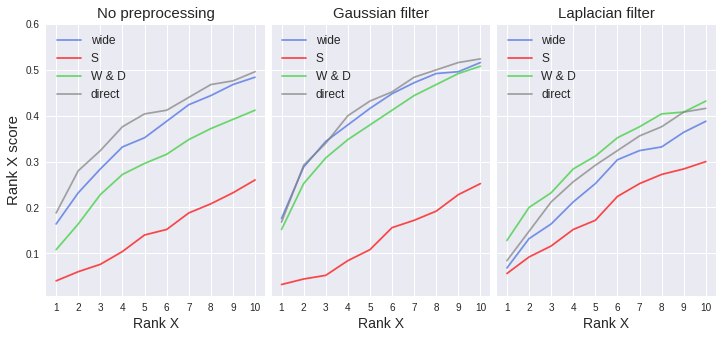

In [131]:
plt.style.use("seaborn")
f, ax = plt.subplots(1, 3, figsize=(12,5), sharey=True, gridspec_kw={"wspace":0.03})

for i, name in enumerate(["No preprocessing", "Gaussian filter", "Laplacian filter"]):
    ax[i].set_title(name, fontsize=15)

for i, preproc in enumerate(["no_preprocessing", "gaussian", "laplacian"]):

    temp = xception_data[xception_data["preprocessing"] == preproc]

    for name, row in temp.iterrows():

        ax[i].plot(
            list(range(1,11)),
            row[[f"rank{k}" for k in range(1,11)]].values,
            #linestyle=marker_dict[row["final_layers"]],
            color=color_dict[row["final_layers"]],
            label=f"{layer_dict[row['final_layers']]}",
            alpha=0.7
        )

ax[0].set_ylabel("Rank X score", fontsize=15)
ax[0].set_ylim(top=0.6)

for i in range(3):
    ax[i].legend(fontsize=12, loc=2)
    ax[i].set_xlabel("Rank X", fontsize=14)
    ax[i].set_xticks(range(1,11))

f.savefig("figures/cmc_Xception_model_comparison.png", dpi=600, bbox_inches="tight")